# PP2 - Parte 1

# Autores
Ian Gustavo Alves Pessoa Silva - 1715080288  
William Azevedo da Silva - 1615080226  
Daniel Akio Chen - 1715080253  
Levi da Silva Lima - 1615080131  


### Import das bibliotecas

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex, display

### Import do arquivo a ser usado

In [2]:
dados_brutos = np.fromfile('./dataAll.txt')


### Organização dos dados

In [3]:
dados_consertados = dados_brutos.reshape((1000,3))
dados = dados_consertados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


### Inicialização dos pesos aleatórios

In [4]:
# Distribuição uniforme aleatório dos pesos,
# 3 pesos, entre -0.5 e 0.5
pesos = np.random.uniform(-0.5, 0.5, 3)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [-0.01144339  0.36848653  0.29235931]


### Função de ativação

In [5]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0
        

### Principal - Aprendizado

In [6]:
res_temp = 0                  # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(1000)  # Vetor que será comparado com o resultado

n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste
fa = 0              # Funcao de ativacao

#Ele só para quando o vetor de respostas for igual ao vetor final
while(True):

    print("Epoca ", epoca+1, ": ")
    for i in range(len(dados[0])):

        vetor_res_temp = (x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2])

        fa = funcao_ativacao(vetor_res_temp)

        vetor_final[i] = fa

        if (fa != vetor_resposta[i]): #Se estiver errado

            #Erro é (esperado - funcao ativacao)
            erro = vetor_resposta[i] - fa

            valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
            #Ajuste de peso
            pesos = pesos + (n*erro*valor_anterior)
            mudanca_peso += 1

            #Print vetor de pesos, exerc 5
            print(pesos)

    epoca += 1

    #Print dos pesos da época
    print("Época ", epoca, ": ", mudanca_peso, " pesos mudados")
    mudanca_total += mudanca_peso
    mudanca_peso = 0

    if((vetor_resposta == vetor_final).all()):
        break



print("convergiu!")
# Se for true, quer dizer que os dois são iguais, chegou a uma convergência
# print((vetor_resposta == vetor_final).all())


Epoca  1 : 
[  0.08855661  16.86675653 -61.02928069]
[-1.14433914e-02  8.96627765e+01 -2.51997207e+01]
[ 8.85566086e-02  6.13316653e+00 -1.24325551e+02]
[   0.18855661   55.32002653 -107.69682069]
[ 8.85566086e-02  1.37918727e+02 -2.78409907e+01]
[   0.18855661   97.90981653 -105.73368069]
[  0.28855661 147.37063653 -56.83963069]
[   0.38855661  107.82138653 -153.93367069]
[  0.48855661 200.06336653 -67.46110069]
[  0.58855661 188.16625653 -95.36064069]
[   0.68855661  159.95879653 -128.94476069]
[   0.58855661   95.66958653 -197.00939069]
[   0.48855661  148.77390653 -161.22999069]
[   0.58855661  213.76506653 -100.33831069]
[   0.48855661  162.83148653 -163.73828069]
[  0.58855661 249.96624653 -77.04845069]
[   0.68855661  198.05091653 -133.24947069]
[   0.78855661  133.16488653 -207.86556069]
[   0.68855661  200.20253653 -157.69906069]
[   0.58855661  122.73958653 -255.68677069]
[   0.68855661  207.59046653 -194.41339069]
[   0.58855661  140.91563653 -264.30872069]
[   0.68855661  1

### Calculo da função da reta

In [7]:
# Encontrar função da reta
#y = a - b*x
#a = w0/w2
#b = w1/w2
funcao_a = pesos[0]/pesos[2]
funcao_b = pesos[1]/pesos[2]

x = np.arange(-1000,1000)

y = funcao_a - funcao_b * x

print("funcao: y=", funcao_a, "-", funcao_b, "*x")


funcao: y= -0.0017456810410010914 - -1.0004788247778509 *x


### Plot do gráfico e print dos ajustes e épocas totais

O número total de ajustes de peso é: {{mudanca_total}}

Total de épocas:  3


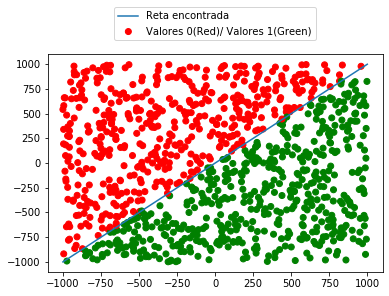

In [12]:
# Plot da reta e dos pares

cor = np.where(vetor_resposta == 0, "red", "green")

print("Total de ajustes de peso: ", mudanca_total)
# display(Markdown("O número total de ajustes de peso é: {{mudanca_total}}"))
print("Total de épocas: ", epoca)

plt.scatter(vetor1, vetor2, c=cor, label = "Valores 0(Red)/ Valores 1(Green)")
plt.plot(x, y, label = "Reta encontrada")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.24))